# Homework 1

## References

+ Lectures 1 through 4 (inclusive).


## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

import numpy as np
import scipy
import scipy.stats as st
import urllib.request
import os

def download(
    url : str,
    local_filename : str = None
):
    """Download a file from a url.

    Arguments
    url            -- The url we want to download.
    local_filename -- The filemame to write on. If not
                      specified
    """
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

## Student details

+ **First Name: Derek**
+ **Last Name: Yu**
+ **Email: yu1481@purdue.edu**
+ **Used generative AI to complete this assignment (Yes/No): Yes**
+ **Which generative AI tool did you use (if applicable)?: ChatGPT**

## Problem 1

Disclaimer: This example is a modified version of the one found in a 2013 lecture on Bayesian Scientific Computing taught by Prof. Nicholas Zabaras.
I am not sure where the original problem is coming from.

We are tasked with assessing the usefulness of a tuberculosis test.
The prior information I is:

> The percentage of the population infected by tuberculosis is 0.4\%.
We have run several experiments and determined that:
+ If a tested patient has the disease, then 80\% of the time the test comes out positive.
+ If a tested patient does not have the disease, then 90\% of the time the test comes out negative.

To facilitate your analysis, consider the following logical sentences concerning a patient:

> A: The patient is tested and the test is positive.

> B: The patient has tuberculosis.

A. Find the probability that the patient has tuberculosis (before looking at the result of the test), i.e., $p(B|I)$. This is known as the base rate or the prior probability.<br>
#**Answer: 0.4%**

The prevalence (prior) rate before looking at any results is: ***0.4%***
<br><br><br><br><br>


B. Find the probability that the test is positive given that the patient has tuberculosis, i.e., $p(A|B,I)$.<br>
#**Answer: 80%**

$p(A|B,I) = 0.80$
<br><br><br><br><br>

C. Find the probability that the test is positive given that the patient does not have tuberculosis, i.e., $p(A|\neg B, I)$.<br>
#**Answer: 10%**

Tests are negative 90% of the time when patient does not have tuberculosis
<br><br><br><br><br><br>


D. Find the probability that a patient that tested positive has tuberculosis, i.e., $p(B|A,I)$.<br>
#**Answer: 3.11%**

Bayes’ Theorem for the TB Test

We want:
\begin{aligned}
p(B \mid A)
= \frac{p(A \mid B)\,p(B)}{p(A)}
\end{aligned}
where

- \(B\) = patient has TB  
- \(A\) = test is positive  
- \(p(B)=0.004\) (0.4% prevalence)  
- \(p(A | B)=0.80\) (80% sensitivity)  
- \(p(A | ¬B)=0.10\) (10% false‐positive rate)  

---

Compute the marginal probability of a positive:

\begin{aligned}
p(A)
&= p(A\mid B)\,p(B)\;+\;p(A\mid \neg B)\,p(\neg B)\\
&= 0.80\cdot0.004\;+\;0.10\cdot0.996\\
&= 0.0032 + 0.0996\\
&= 0.1028.
\end{aligned}


Then:

\begin{aligned}
p(B\mid A)
&= \frac{0.80\cdot0.004}{0.1028}\\
&= \frac{0.0032}{0.1028}\\
&\approx 0.0311 = 3.11\%.
\end{aligned}


In [1]:
p_B = 0.004           # prevalence
p_A_given_B = 0.80    # sensitivity
p_A_given_notB = 0.10 # false-positive rate

p_notB = 1 - p_B
p_A = p_A_given_B * p_B + p_A_given_notB * p_notB

p_B_given_A = (p_A_given_B * p_B) / p_A

print(f"p(A)           = {p_A:.4f}")
print(f"p(B)           = {p_B:.4f}")
print(f"p(B | A)       = {p_B_given_A:.4f}  ({p_B_given_A*100:.2f}%)")

p(A)           = 0.1028
p(B)           = 0.0040
p(B | A)       = 0.0311  (3.11%)


<br><br><br><br>
E. Find the probability that a patient that tested negative has tuberculosis, i.e., $p(B|\neg A, I)$. Does the test change our prior state of knowledge about about the patient? Is the test useful?<br>
#**Answer: 0.0892%**

Negative Predictive Value for the TB Test

We want:

\begin{aligned}
p(B \mid \neg A)
= \frac{p(\neg A \mid B)\,p(B)}{p(\neg A)}
\end{aligned}
where:

- \(B\) = patient **has** TB  
- \(¬A\) = test is **negative**  
- \(p(B)=0.004\) (0.4% prevalence)  
- \(p(¬A | B)=1 - p(A | B)=1 - 0.80=0.20\) (20% false‐negative rate)  
- \(p(¬A | ¬B)=\) specificity \(=0.90\)  

---

First compute the marginal probability of a negative:

\begin{aligned}
p(\neg A)
&= p(\neg A\mid B)\,p(B)\;+\;p(\neg A\mid \neg B)\,p(\neg B)\\
&= 0.20 \times 0.004\;+\;0.90 \times 0.996\\
&= 0.0008 + 0.8964\\
&= 0.8972.
\end{aligned}

Then:

\begin{aligned}
p(B\mid \neg A)
&= \frac{0.20 \times 0.004}{0.8972}\\
&= \frac{0.0008}{0.8972}\\
&\approx 0.000892 \;=\; 0.0892\%
\end{aligned}


<br><br><br><br>

In [ ]:
# Given parameters
p_B = 0.004                  # prevalence p(B)
p_negA_given_B = 1 - 0.80    # false-negative rate p(~A|B)
p_negA_given_notB = 0.90     # specificity p(~A|~B)
p_notB = 1 - p_B

# Marginal probability of a negative result
p_negA = p_negA_given_B * p_B + p_negA_given_notB * p_notB

# Posterior p(B|~A) via Bayes' rule
p_B_given_negA = (p_negA_given_B * p_B) / p_negA

print(f"p(~A)            = {p_negA:.4f}")
print(f"p(B)             = {p_B:.4f}")
print(f"p(B | ~A)        = {p_B_given_negA:.6f} ({p_B_given_negA*100:.4f}%)")

<br><br><br><br>
F. What would a good test look like? Find values for

$$
p(A|B,I)= p(\text{test is positive} |\text{has tuberculosis},I),
$$

and

$$
p(A| \neg B, I) = p(\text{test is positive}|\text{does not have tuberculosis}, I),
$$

so that

$$
p(B|A, I) = p(\text{has tuberculosis}|\text{test is positive}, I) = 0.99.
$$

There are more than one solutions. How would you pick a good one? Thinking in this way can help you set goals if you work in R\&D. If you have time, try to figure out whether or not there exists such an accurate test for tuberculosis<br>
#**Answer:**

F. Designing a 99% PPV Test for TB

We want to choose  
$$
\alpha = p(A\mid B,I),\quad
\beta  = p(A\mid \neg B,I)
$$
so that
$$
p(B\mid A,I)
= \frac{\alpha\,p(B)}{\alpha\,p(B) \;+\;\beta\,p(\neg B)}
= 0.99,
$$
with $(p(B)=0.004)$ and $(p(¬B)=0.996)$.

---

### Derivation

1.  Set up Bayes:
    \[
      0.99
      = $\frac{\alpha\cdot0.004}{\alpha\cdot0.004 + \beta\cdot0.996}$
    \]
2.  Solve for \(β\) in terms of \(α\):
    $$
      \alpha\cdot0.004
      = 0.99\bigl(\alpha\cdot0.004 + \beta\cdot0.996\bigr)
      \;\Longrightarrow\;
      \beta
      = \frac{0.01\;\alpha\;0.004}{0.99\;0.996}
      \approx 0.0000406\,\alpha
    $$
3.  **Choosing one...**  
    If we pick \(α=0.99\) (99% sensitivity), then
    $$
      \beta \approx 0.99\times0.0000406 \approx 0.0000402
      = 0.00402 percent
    $$

---

### How to pick a “good” solution?

- **High sensitivity (α)** so you catch nearly all true cases.
- **Ultra‐high specificity** (\(1-β\)) to drive false positives down enough that PPV ≥99%.
- In practice you’d plot an **ROC curve** and choose the operating point \((α, β)\) that meets your PPV goal with acceptable sensitivity.

<br><br><br><br><br>

## Problem 2 - Practice with discrete random variables

Consider the Categorical random variable:

$$
X \sim \operatorname{Categorical}(0.3, 0.1, 0.2, 0.4),
$$

taking values in $\{0,1,2,3\}$. Find the following (you may use ``scipy.stats.rv_discrete`` or do it by hand):

A. The expectation $\mathbb{E}[X]$.

#**Answer: 1.7**


In [1]:
import numpy as np

# Define the discrete random variable X with values {0,1,2,3}
# and corresponding probabilities {0.3, 0.1, 0.2, 0.4}
values = np.array([0, 1, 2, 3])
probs  = np.array([0.3, 0.1, 0.2, 0.4])

# Compute the expectation E[X] = sum(x * p(x))
E_X = np.dot(values, probs)

print("Expectation E[X] =", E_X)

Expectation E[X] = 1.7000000000000002


B. The variance $\mathbb{V}[X]$.

#**Answer: 1.61**

In [2]:
import numpy as np

# Define the discrete random variable X with values {0,1,2,3}
# and corresponding probabilities {0.3, 0.1, 0.2, 0.4}
values = np.array([0, 1, 2, 3])
probs  = np.array([0.3, 0.1, 0.2, 0.4])

# Compute the expectation E[X]
E_X = np.dot(values, probs)

# Compute E[X^2]
E_X2 = np.dot(values**2, probs)

# Variance V[X] = E[X^2] - (E[X])^2
Var_X = E_X2 - E_X**2

print("Variance V[X] =", Var_X)

Variance V[X] = 1.6099999999999994


C. Plot the probability mass function of $X$.

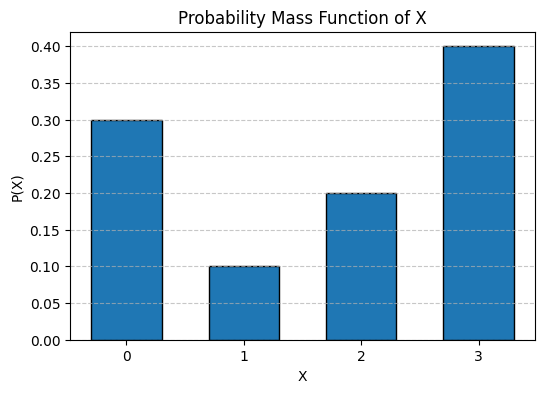

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the values and their probabilities
values = np.array([0, 1, 2, 3])
probs  = np.array([0.3, 0.1, 0.2, 0.4])

# Plotting the PMF as a bar plot
plt.figure(figsize=(6, 4))
plt.bar(values, probs, width=0.6, edgecolor='black')
plt.xticks(values)
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Probability Mass Function of X')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

D. Find the probability that $X$ is in $\{0, 2\}$.

#**Answer: 0.5**
0.3 + 0.2 = 0.5
<br><br>

E. Find $\mathbb{E}[4X + 3]$.

#**Answer: 9.8**
$\mathbb{E}[4X + 3]$ = 4 ⋅ 1.7 + 3 = 6.8 + 3 = 9.8.
<br><br>

F. Find $\mathbb{V}[4X+3]$.

#**Answer: 25.76**

$\mathbb{V}[4X + 3]$ = 4^2 ⋅ 1.61 = 16 ⋅ 1.61 = 25.76
<br><br>

## Problem 3 - Predicting the probability of major earthquakes in Southern California

The [San Andreas fault](https://en.wikipedia.org/wiki/San_Andreas_Fault) extends through California forming the boundary between the Pacific and the North American tectonic plates.
It has caused some of the major earthquakes on Earth.
We are going to focus on Southern California and we would like to assess the probability of a major earthquake, defined as an earthquake of magnitude 6.5 or greater, during the next ten years.

A. The first thing we are going to do is go over a [database of past earthquakes](https://scedc.caltech.edu/significant/chron-index.html) that have occured in Southern California and collect the relevant data. We are going to start at 1900 because data before that time may are unreliable.
Go over each decade and count the occurence of a major earthquake (i.e., count the number of organge and red colors in each decade). We have done this for you.

/tmp/ipython-input-8-717154888.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best", frameon=False)


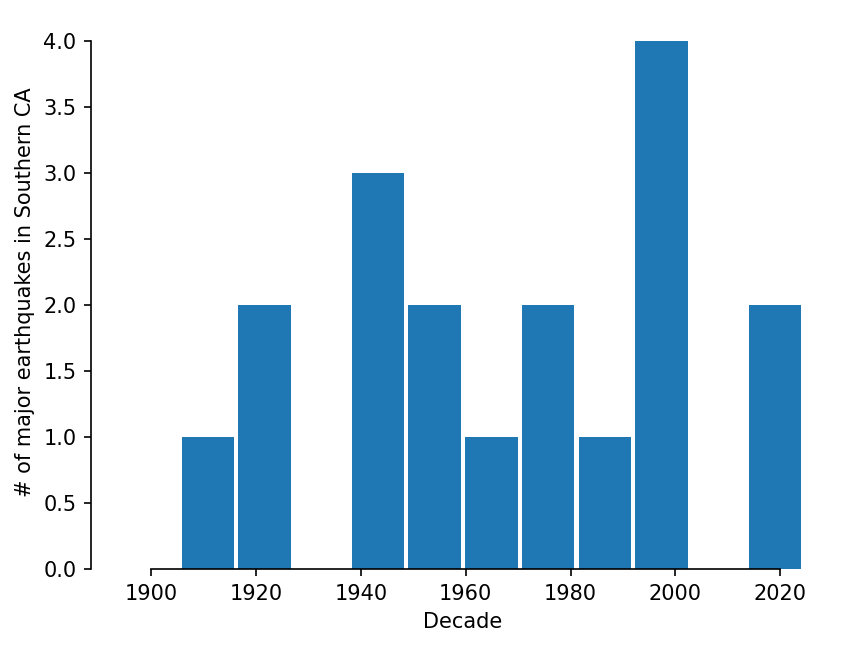

In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

eq_data = np.array([
    0, # 1900-1909
    1, # 1910-1919
    2, # 1920-1929
    0, # 1930-1939
    3, # 1940-1949
    2, # 1950-1959
    1, # 1960-1969
    2, # 1970-1979
    1, # 1980-1989
    4, # 1990-1999
    0, # 2000-2009
    2 # 2010-2019
])
fig, ax = plt.subplots(dpi=150)
ax.bar(np.linspace(1900, 2019, eq_data.shape[0]), eq_data, width=10)
ax.set_xlabel('Decade')
ax.set_ylabel('# of major earthquakes in Southern CA')
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

B. The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is a discrete distribution with values $\{0,1,2,\dots\}$ which is commonly used to model the number of events occuring in a certain time period.
It is the right choice when these events are happening independently and the probability of any event happening over a small period of time is constant.
Let's use the Poisson to model the number of earthquakes $X$ occuring in a decade.
We write:

$$
X \sim \operatorname{Poisson}(r),
$$

where $r$ is the *rate parameter* of Poisson.
The rate is the number of events per time period.
Here, $r$ is the number of earthquakes per decade.
Using the data above, we can set the rate as the empirical average of the observed number of earthquakes per decade:

In [6]:
r = np.mean(eq_data)
print('r = {0:1.2f} major earthquakes per decade'.format(r))

r = 1.50 major earthquakes per decade


Strictly speaking, **this is not how you should be calibrating models!!!**
We will learn about the **right** way (which uses Bayes' rule) in the subsequent lectures.
But it will do for now as the answer you would get using the **right** way is, for this problem, almost the same.
Let's define a Poisson distribution using ``scipy.stats.poisson`` (see documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)):

In [9]:
X = st.poisson(r)

A. Plot the probability mass function of ``X``.

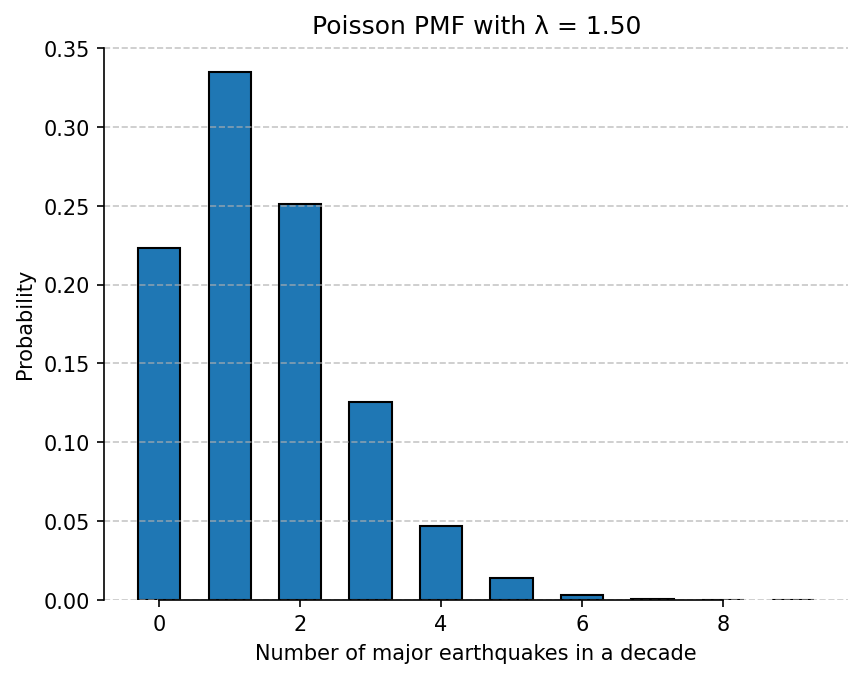

In [10]:
# Define some range of values for plotting the PMF
k_values = np.arange(0, 10)

# Compute PMF for each value
pmf_values = X.pmf(k_values)

fig, ax = plt.subplots(dpi=150)
ax.bar(k_values, pmf_values, width=0.6, edgecolor='black')
ax.set_title(f'Poisson PMF with λ = {r:.2f}')
ax.set_xlabel('Number of major earthquakes in a decade')
ax.set_ylabel('Probability')
sns.despine(trim=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

B. What is the probability that at least one major earthquake will occur during the next decade?<br>
#**Answer:  0.777**
<br><br>

In [11]:
p_at_least_one = 1 - X.pmf(0)

print("P(X ≥ 1) =", round(p_at_least_one, 4))

P(X ≥ 1) = 0.7769


C. What is the probability that at least one major earthquake will occur during the next two decades?
Hint: Consider two independent and identical copies of $X$, say $X_1$ and $X_2$.
And consider their sum $Y = X_1 + X_2$. Read [this](https://en.wikipedia.org/wiki/Poisson_distribution#Sums_of_Poisson-distributed_random_variables) about the sum of two independent Poisson distributions.
<br>
#**Answer: 0.95**
<br>

In [12]:
# Define new Poisson distribution over two decades
Y = st.poisson(2 * r)

# Compute probability of at least one earthquake
p_at_least_one_two_decades = 1 - Y.pmf(0)

print("P(at least one major earthquake in 2 decades) =", round(p_at_least_one_two_decades, 4))

P(at least one major earthquake in 2 decades) = 0.9502


D. What is the probability that at least one major earthquake will occur during the next five decades?<br>
#**Answer: 0.999447**
<br>

In [13]:
Z5 = st.poisson(5 * r)
p_at_least_one_5 = 1 - Z5.pmf(0)

print(f"P(at least one major earthquake in 5 decades) = {p_at_least_one_5:.6f}")

P(at least one major earthquake in 5 decades) = 0.999447


## Problem 4 - Failure of a mechanical component

Assume that you designing a gear for a mechanical system.
Under normal operating conditions the gear is expected to fail at a random time.
Let $T$ be a random variable capturing the time the gear fails.
What should the probability density of $T$ look like?

Here are some hypothetical data to work with.
Suppose that we took ten gears and we worked them until failure.
The failure times (say in years) are as follows:

In [14]:
time_to_fail_data = np.array(
    [
        10.5,
        7.5,
        8.1,
        8.4,
        11.2,
        9.3,
        8.9,
        12.4
    ]
)

Why does each gear fail at different times?
There are several sources of uncertainty.
The most important are:

- Manufacturing imperfections.
- Different loading conditions.

If this was a controlled fatigue experiment, then we could eliminate the second source of uncertainty by using exactly the same loading conditions.

Now, we are going to fit a probability density function to these data.
Which one should we use?
Well, new gears do not fail easily.
So, the probability density function of $T$ should be close to zero for small $T$.
As time goes by, the probability density should increase because various things start happening to the material, e.g., crack formation, fatigue, etc.
Finally, the probability density must again start going to zero as time further increases because nothing lasts forever...
A probability distribution that is commonly used to model this situation is the [Weibull](https://en.wikipedia.org/wiki/Weibull_distribution).
We are going to fit some fail time data to a Weibull distribution and then you will have to answer a few questions about failing times.

The Weibull has parameters and we are going to fit them to the available data.
The method we are going to use is called the *maximum likelihood method*.
We haven't really talked about this, and it is not important to know what it is to do this homework problem.
We will learn about maximum likelihood in later lectures.
Here is how we fit the parameters using `scipy.stats`:

In [15]:
fitted_params = st.exponweib.fit(time_to_fail_data, loc=0)
T = st.exponweib(*fitted_params)
print(f"Fitted parameters: {fitted_params}")

Fitted parameters: (np.float64(448.066965711728), np.float64(0.7099665338918923), np.float64(3.4218808260575804), np.float64(0.41627831297126994))


Let's plot the fitted Weibul PDF and the data we used:

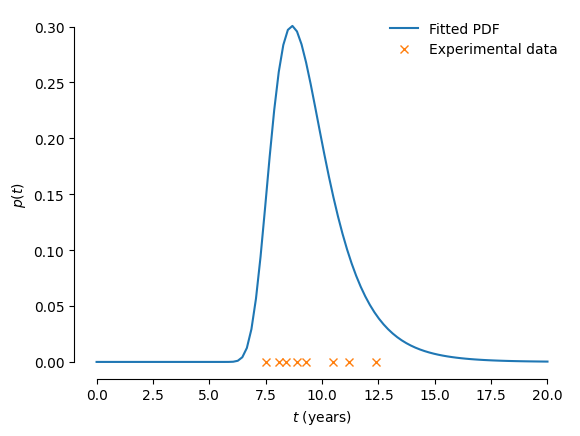

In [16]:
fig, ax = plt.subplots()
ts = np.linspace(0.0, 20.0, 100)
ax.plot(
    ts,
    T.pdf(ts),
    label="Fitted PDF"
)
ax.plot(
    time_to_fail_data,
    np.zeros_like(time_to_fail_data),
    "x",
    label="Experimental data"
)
ax.set_xlabel(r"$t$ (years)")
ax.set_ylabel(r"$p(t)$")
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

Now you have to answer a series of questions about the random variable $T$ that we just fitted.

A. Find the mean fail time and its variance.
Hint: Do not integrate anything by hand. Just use the functionality of ``scipy.stats``.

In [18]:
t_mean = T.mean()
t_var = T.var()
print(f"E[T] = {t_mean:.2f}")
print(f"V[T] = {t_var:.2f}")

E[T] = 9.53
V[T] = 2.88


B. Plot the cumulative distribution function $F(t) = P(T\le t)$ of $T$.

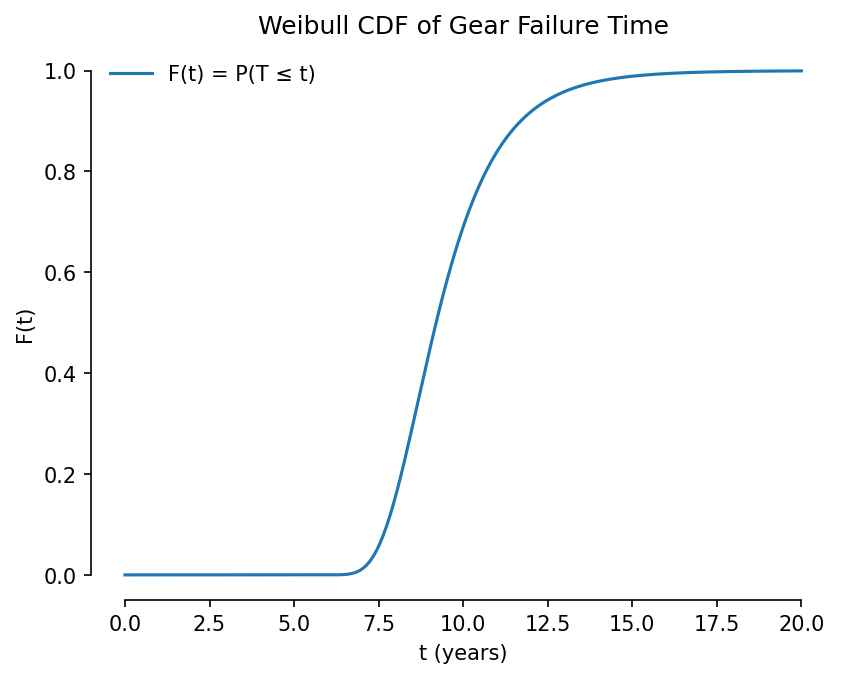

In [19]:
ts = np.linspace(0.0, 20.0, 200)

fig, ax = plt.subplots(dpi=150)
ax.plot(ts, T.cdf(ts), label='F(t) = P(T ≤ t)')
ax.set_xlabel('t (years)')
ax.set_ylabel('F(t)')
ax.set_title('Weibull CDF of Gear Failure Time')
ax.legend(loc='best', frameon=False)
sns.despine(trim=True)
plt.show()

C. Plot the probability that gear survives for more than $t$ as a function of $t$.
That is, plot the function:

$$
S(t) = p(T > t).
$$

Hint: First connect $S(t)$ to the cumulative distribution function $F(t)$ of $T$.

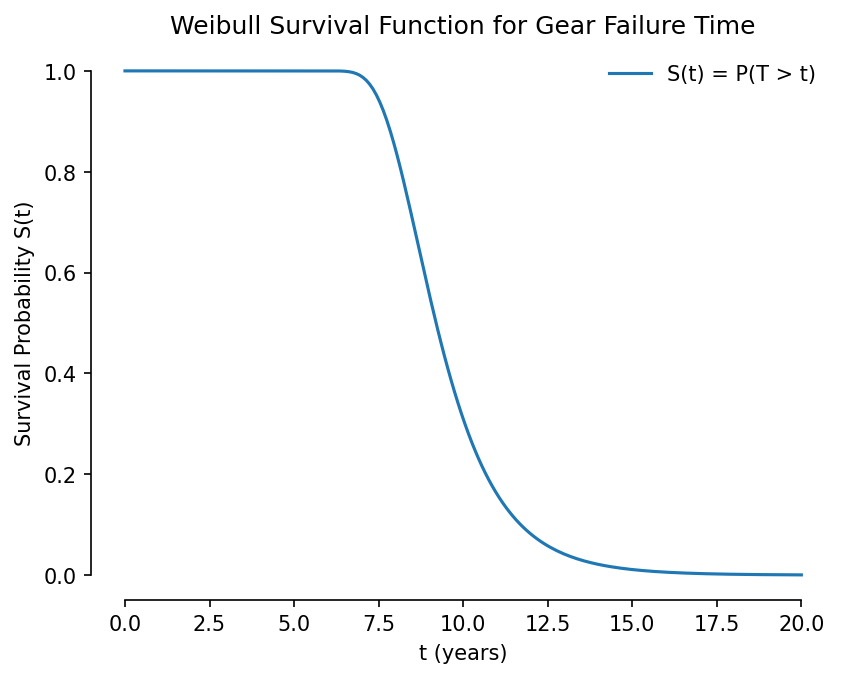

In [20]:
# Plot the survival function S(t) = P(T > t)
ts = np.linspace(0.0, 20.0, 200)
S_ts = 1 - T.cdf(ts)   # or equivalently, T.sf(ts)

fig, ax = plt.subplots(dpi=150)
ax.plot(ts, S_ts, label='S(t) = P(T > t)')
ax.set_xlabel('t (years)')
ax.set_ylabel('Survival Probability S(t)')
ax.set_title('Weibull Survival Function for Gear Failure Time')
ax.legend(loc='best', frameon=False)
sns.despine(trim=True)
plt.show()

D. Find the probability that the gear lasts anywhere between 8 and 10 years.

In [23]:
# Probability gear lasts between 8 and 10 years:
p_between_8_10 = T.cdf(10) - T.cdf(8)
print(f"P(8 < T ≤ 10) = {p_between_8_10:.4f}")

P(8 < T ≤ 10) = 0.5343


E. Find the time $t^*$ such that the probability that the gear fails before $t^*$ is $0.01$.

In [22]:
t_star = T.ppf(0.01)
print(f"t* (1st percentile) = {t_star:.2f} years")


t* (1st percentile) = 6.98 years
